In [1]:
import sklearn
import random

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
money = pd.read_csv("USD_CURRENCY_HISTORY.csv", sep=",")

In [5]:
past = 7 * 4 # данные за 4 недели для обучения
future = 7 # кол-во дней для предсказания

In [6]:
values = money["curs"]

In [7]:
len(values)

409

In [8]:
start = past
end = len(values) - future
raw_df = []
for i in range(start, end):
    past_and_future_value = values[(i-past):(i+future)]
    raw_df.append(list(past_and_future_value))

In [9]:
past_columns = [f"past_{i}" for i in range(past)]
future_columns = [f"future_{i}" for i in range(future)]

In [10]:
df = pd.DataFrame(raw_df, columns=(past_columns+future_columns))

In [11]:
df.head(5)

past_0   past_1   past_2   past_3   past_4   past_5   past_6   past_7  \
0  57.0463  56.8734  56.9957  56.6019  56.3569  56.3878  56.5925  56.7597   
1  56.8734  56.9957  56.6019  56.3569  56.3878  56.5925  56.7597  56.5892   
2  56.9957  56.6019  56.3569  56.3878  56.5925  56.7597  56.5892  56.6261   
3  56.6019  56.3569  56.3878  56.5925  56.7597  56.5892  56.6261  56.4115   
4  56.3569  56.3878  56.5925  56.7597  56.5892  56.6261  56.4115  56.3888   

    past_8   past_9  ...  past_25  past_26  past_27  future_0  future_1  \
0  56.5892  56.6261  ...  57.7701  57.5899  56.5918   56.3554   56.3438   
1  56.6261  56.4115  ...  57.5899  56.5918  56.3554   56.3438   56.5201   
2  56.4115  56.3888  ...  56.5918  56.3554  56.3438   56.5201   56.6537   
3  56.3888  55.9288  ...  56.3554  56.3438  56.5201   56.6537   56.7608   
4  55.9288  55.8288  ...  56.3438  56.5201  56.6537   56.7608   55.9208   

   future_2  future_3  future_4  future_5  future_6  
0   56.5201   56.6537   56.7608   55.9208   55.6717  
1   56.6537   56.7608   55.9208   55.6717   56.3742  
2   56.7608   55.9208   55.6717   56.3742   56.4334  
3   55.9208   55.6717   56.3742   56.4334   56.6616  
4   55.6717   56.3742   56.4334   56.6616   57.1000  

[5 rows x 35 columns]

In [12]:
X = df[past_columns][:-1]
y = df[future_columns][:-1]

In [13]:
X_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]

In [14]:
def predict_by_any_regressor(regressor):
    np.random.seed(666)
    regressor.fit(X,y)
    prediction = regressor.predict(X_test)[0]
    plt.plot(prediction, label="prediction")
    plt.plot(y_test.iloc[0], label="real")
    plt.legend()
    norma = np.linalg.norm(y_test - prediction)
    mean = sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))
    print(f"norma={norma}, mean={mean}")

# Предсказания

norma=1.1950827395156072, mean=0.39069872464912486


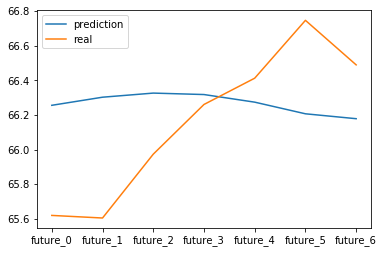

In [15]:
LinReg = LinearRegression(normalize=True)
predict_by_any_regressor(LinReg)

## MLPRegressor с тремя hidden-слоями

norma=0.9596742019117412, mean=0.29531471495287626


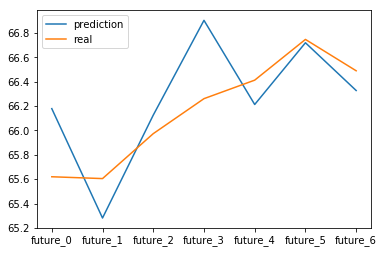

In [16]:
mlp = MLPRegressor(max_iter=10000, hidden_layer_sizes=(16, 16, 8))
predict_by_any_regressor(mlp)

## RandomForest regressor

norma=1.238558393504376, mean=0.34217200000001313


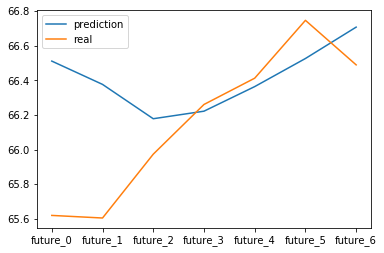

In [17]:
rnd = RandomForestRegressor(n_estimators=200)
predict_by_any_regressor(rnd)

norma=1.1950827395156127, mean=0.39069872464912897


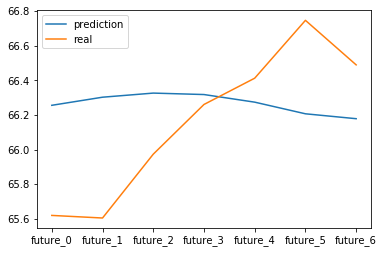

In [18]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
clf = MultiOutputRegressor(estimator=LinearRegression())
predict_by_any_regressor(clf)